## Machine Learning Assignment

1) Data preprocessing 
2) Descriptive Statistics and Data Visualization
3) Model with Multiple Linear Regression verifying all the assumptions

Group 1: Simran Jhamtani, Vedanti Patil


## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('retail.csv')
df.shape

(8523, 12)

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
list(df.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.84775,0.066132,140.992782,1997.831867,2181.288914
std,4.22618,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.80000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Outlet_Size has 2410 Nan values which needs to be filled

#### Preprocessing on columns

In [9]:
df.Item_Fat_Content.unique()    #Found the unique categories of column Item_Fat_Content to be repetitive

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)
df.Item_Fat_Content.unique()

#Replaced LF, low fat with Low fat since all belong to same category


array(['Low Fat', 'Regular'], dtype=object)

In [11]:
df.Item_Type.unique()   

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [13]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [16]:
df.loc[(df['Outlet_Size'].isna())&(df['Outlet_Location_Type'] == 'Tier 2')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [17]:
# There are 1855 rows where ['Outlet_Location_Type'] == 'Tier 2' and Outlet_Size is NULL

# If an item's Outlet_Location_Type is Tier2 it's outlet_Size will be always small, thus replacing the NULL values with Small



In [18]:
df.loc[(df['Outlet_Size'].isna())&(df['Outlet_Location_Type'] == 'Tier 2'),'Outlet_Size'] = 'Small'

In [19]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [20]:
# 555 rows have NaN values. Checking the relation between Outlet_Type and Outlet_Size

In [21]:
pd.crosstab(df['Outlet_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,3715
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [22]:
df[df['Outlet_Size'].isnull()]   

# All the values that have missing Outlet_Size have Outlet_Type = Grocery Store
# From above contingency table we find that all items with Outlet_Type=Grocery Store have Outlet_Size='Small'
# Thus replacing the remaining NULL values with 'Small' as well



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [23]:
df.loc[(df['Outlet_Size'].isna()) & (df['Outlet_Type']=='Grocery Store'), 'Outlet_Size'] = 'Small'

In [24]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Desciptive Statistics and Data visualization

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


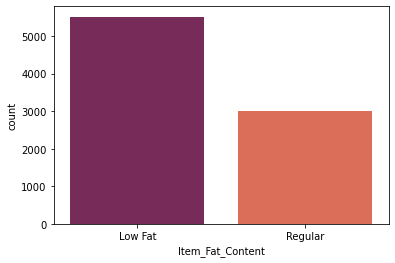

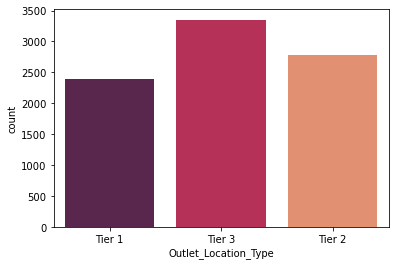

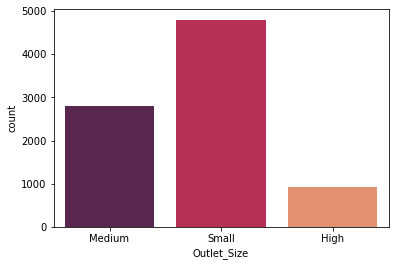

In [27]:
categorical_variables = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size']
for categories in categorical_variables:
    plt.figure(figsize=(6,4))
    sns.countplot(x=categories , data=df, palette='rocket') 

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

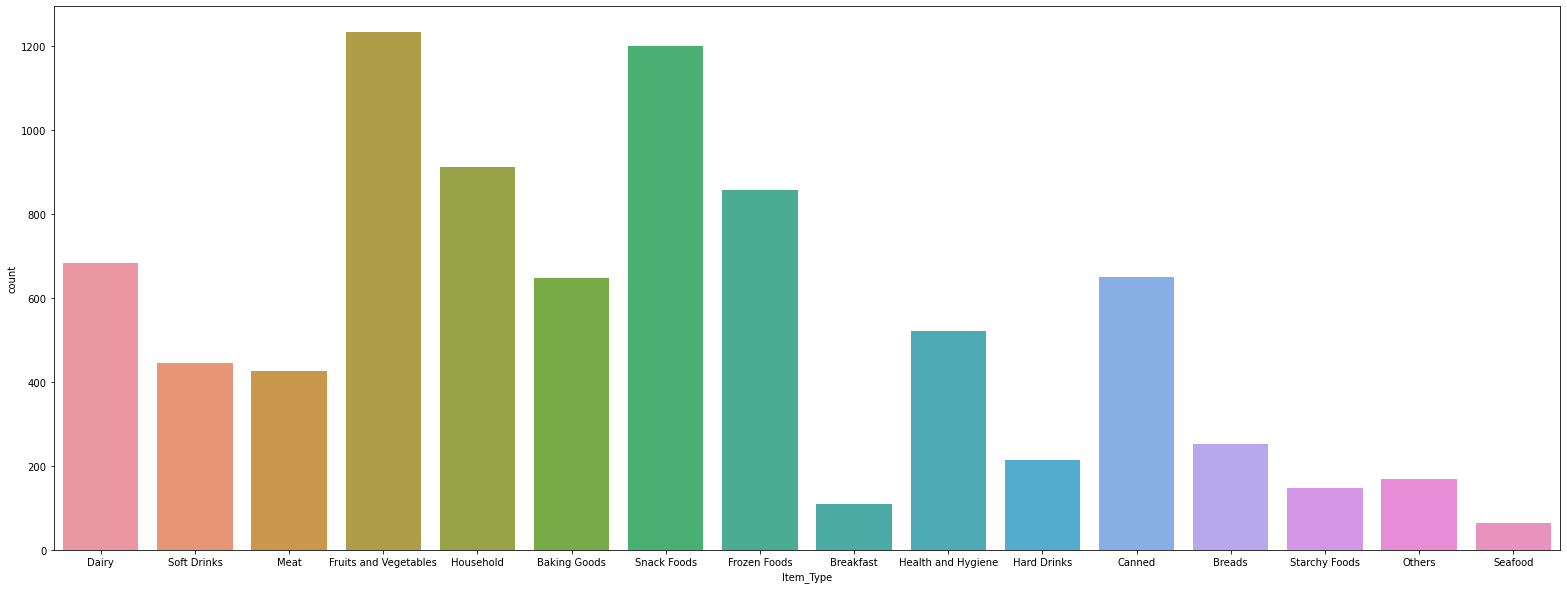

In [28]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

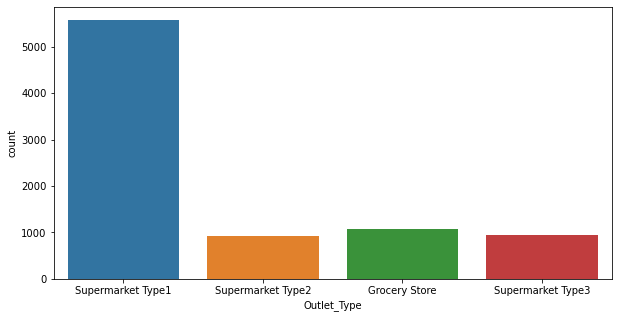

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type' , data=df)

In [30]:
# From above graphs we conclude the following:


# 1) Number of low fat items are greater than regular fat items

# 2) Tier 3 outlet location type is more dominant than other 2 categories

# 3) Outlets with small size are more in number than 'High' and 'Medium'

# 4) Fruits and vegetables is dominant category in Item Type



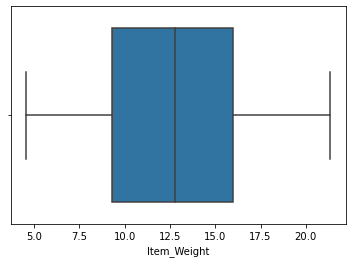

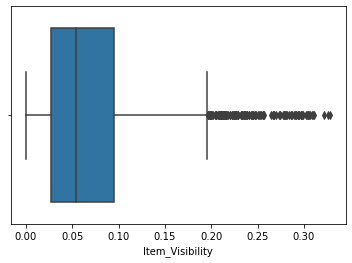

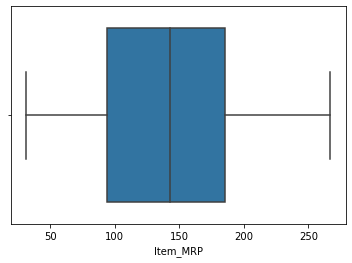

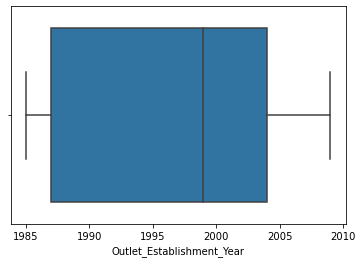

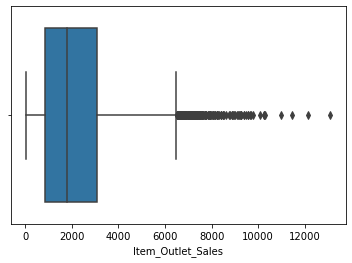

In [31]:
numerical_variables =[ 'Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for categories in numerical_variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[categories])



In [32]:
# Item Visibility has outliers which needs to be removed

In [33]:
# Calculating the percentiles to change the value of outliers to upper or lower limit

In [34]:
percentile25 = df['Item_Visibility'].quantile(0.25)
percentile75 = df['Item_Visibility'].quantile(0.75)

IQR = percentile75 - percentile25
lower_limit = percentile25 - 1.5 * IQR
upper_limit = percentile75 + 1.5 * IQR

print(f'Upper limit is:{upper_limit}')
print(f'Lower limit is:{lower_limit}')

Upper limit is:0.195979015
Lower limit is:-0.07440424500000001


In [35]:
df1 = df.copy()
df1['Item_Visibility'] = np.where(
    df1['Item_Visibility'] > upper_limit,upper_limit,np.where(df1['Item_Visibility'] < lower_limit,
        lower_limit,
        df1['Item_Visibility']))

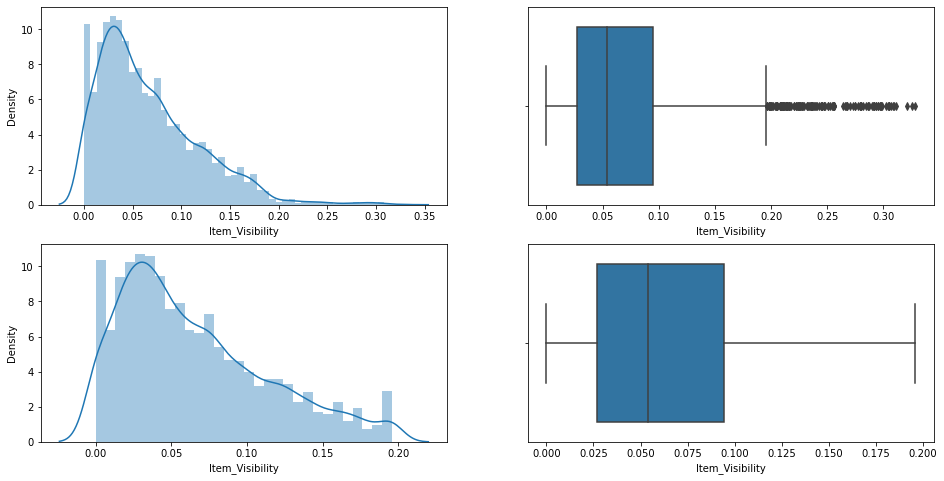

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Item_Visibility'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(2,2,3)
sns.distplot(df1['Item_Visibility'])
plt.subplot(2,2,4)
sns.boxplot(df1['Item_Visibility'])
plt.show()

In [37]:
# Outliers are Removed

<AxesSubplot:>

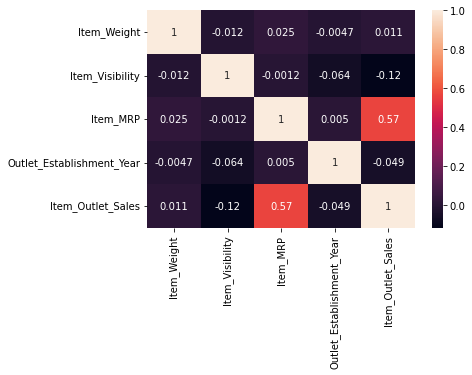

In [38]:
sns.heatmap(df1.corr(), annot=True)

In [39]:
# Heatmap gives correlation between continuous variables...Here we find that our dependent variable Item_Outlet_Sales is 
# majorly affected by Item_mrp. Thus, we drop other columns which don't contribute significantly in predicting sales

In [40]:
df1 = df1.drop(['Item_Identifier','Outlet_Identifier','Item_Weight','Outlet_Establishment_Year'], axis='columns')

In [41]:
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
# Finding the relationship between categorical variables and Item_Outlet_Sales using Annova

In [43]:
# NULL Hypothesis : There is no relation between categorical and continuous variable

# Alternate Hypothesis : There exists a relation


# if p<0.05 we reject the Null hypothesis

# ifp>0.05 we fail to reject the Null Hypothesis

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Item_Outlet_Sales ~ Item_Type', data=df1).fit()
sm.stats.anova_lm(model, typ=2)

# reject the Null hypothesis

,sum_sq,df,F,PR(>F)
Item_Type,1.176182e+08,15.0,2.700653,0.000388
Residual,2.469965e+10,8507.0,NaN,NaN


In [45]:
model1 = ols('Item_Outlet_Sales ~ Outlet_Size', data=df1).fit()
sm.stats.anova_lm(model1, typ=2)

# reject the Null hypothesis

,sum_sq,df,F,PR(>F)
Outlet_Size,1.185425e+09,2.0,213.690965,2.804242e-91
Residual,2.363184e+10,8520.0,NaN,NaN


In [46]:
model2 = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df1).fit()
sm.stats.anova_lm(model2, typ=2)

# Accept the Null hypothesis

,sum_sq,df,F,PR(>F)
Item_Fat_Content,8.695560e+06,1.0,2.986664,0.083989
Residual,2.480857e+10,8521.0,NaN,NaN


In [47]:
model3 = ols('Item_Outlet_Sales ~ Outlet_Location_Type', data=df1).fit()
sm.stats.anova_lm(model3, typ=2)

# reject the Null hypothesis

,sum_sq,df,F,PR(>F)
Outlet_Location_Type,3.103504e+08,2.0,53.94774,5.222817e-24
Residual,2.450691e+10,8520.0,NaN,NaN


In [48]:
model4 = ols('Item_Outlet_Sales ~ Outlet_Type', data=df1).fit()
sm.stats.anova_lm(model4, typ=2)

# reject the Null hypothesis

,sum_sq,df,F,PR(>F)
Outlet_Type,5.945604e+09,3.0,894.650012,0.0
Residual,1.887166e+10,8519.0,NaN,NaN


In [49]:
df2 = df1.drop(['Item_Fat_Content'], axis='columns') #Thus, removing the column which doesn't have any 
# relation with target variable

In [50]:
df2

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...
8518,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
from sklearn.preprocessing import LabelEncoder



# Machine learning Models can't take Categorical Variables so we have to convert them into continuous variables
# This is done by performing Encoding 
# Ordinal categories(which have order) are encoded using Label Encoding
#  Nominal categories(no order) are encoded using dummy variables

In [52]:
I_Type = LabelEncoder()
O_Location_Type = LabelEncoder()
O_Type = LabelEncoder()


In [53]:
df2['Item_Type']=I_Type.fit_transform(df2['Item_Type'])
df2['Outlet_Location_Type']=O_Location_Type.fit_transform(df2['Outlet_Location_Type'])
df2['Outlet_Type']=O_Type.fit_transform(df2['Outlet_Type'])


In [54]:
df2

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,4,249.8092,Medium,0,1,3735.1380
1,0.019278,14,48.2692,Medium,2,2,443.4228
2,0.016760,10,141.6180,Medium,0,1,2097.2700
3,0.000000,6,182.0950,Small,2,0,732.3800
4,0.000000,9,53.8614,High,2,1,994.7052
...,...,...,...,...,...,...,...
8518,0.056783,13,214.5218,High,2,1,2778.3834
8519,0.046982,0,108.1570,Small,1,1,549.2850
8520,0.035186,8,85.1224,Small,1,1,1193.1136
8521,0.145221,13,103.1332,Medium,2,2,1845.5976


In [55]:
df3 = pd.get_dummies(df2,columns=['Outlet_Size'],drop_first=True)

In [56]:
df3

,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small
0,0.016047,4,249.8092,0,1,3735.1380,1,0
1,0.019278,14,48.2692,2,2,443.4228,1,0
2,0.016760,10,141.6180,0,1,2097.2700,1,0
3,0.000000,6,182.0950,2,0,732.3800,0,1
4,0.000000,9,53.8614,2,1,994.7052,0,0
...,...,...,...,...,...,...,...,...
8518,0.056783,13,214.5218,2,1,2778.3834,0,0
8519,0.046982,0,108.1570,1,1,549.2850,0,1
8520,0.035186,8,85.1224,1,1,1193.1136,0,1
8521,0.145221,13,103.1332,2,2,1845.5976,1,0


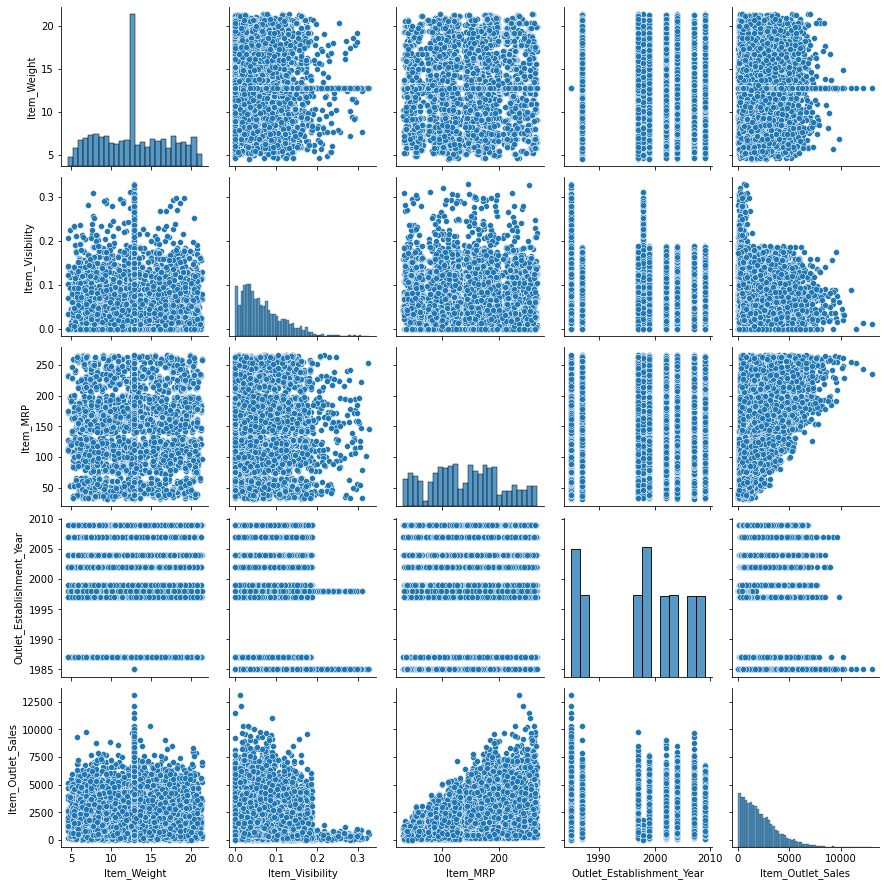

In [57]:
sns.pairplot(df)

In [58]:
X = df3.drop(['Item_Outlet_Sales'], axis='columns')
y = df3['Item_Outlet_Sales']


# X is independent columns
# y is dependent columns
x = X.copy()

In [59]:
sc = StandardScaler()
X = sc.fit_transform(X)


# Bringing the values in one scale using StandardScaler()

<IPython.core.display.Javascript object>

In [60]:
X

array([[-1.00862813, -0.76647929,  1.74745381, ..., -0.25265831,
         1.43232589, -1.13492453],
       [-0.94247279,  1.6089627 , -1.48902325, ...,  1.00297245,
         1.43232589, -1.13492453],
       [-0.99403357,  0.6587859 ,  0.01004021, ..., -0.25265831,
         1.43232589, -1.13492453],
       ...,
       [-0.61674377,  0.1836975 , -0.89720755, ..., -0.25265831,
        -0.69816513,  0.88111586],
       [ 1.6362903 ,  1.3714185 , -0.60797692, ...,  1.00297245,
         1.43232589, -1.13492453],
       [-0.41829281,  1.6089627 , -1.05226104, ..., -0.25265831,
        -0.69816513,  0.88111586]])

In [61]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.2)

# Performing the train test split where 20% is testing data size and 80 % is training data size


### Verifying Multiple Linear Regression assumptions

#### 1.Linearity

In [64]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
y_pred

# Fitting the model 

array([3505.72016756,  766.14570755, 1223.57376556, ..., 1192.53122676,
       1739.3190438 , 2622.23273119])

In [65]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.5243595867889342


In [66]:
c = regr.intercept_
c

2183.476727039869

In [67]:
m = regr.coef_
m

array([-5.61157417e+01,  6.03150644e-01,  9.67784911e+02, -3.64821577e+02,
        1.05707250e+03, -5.68325002e+02, -3.11358989e+02])

In [68]:
# target_pred_test = lr.predict(features_test)
# target_pred_test
y_pred_test = regr.predict(X_test)
y_pred_test

array([2349.85791705, 2588.99624163, 1968.18379462, ..., 4161.10476217,
       -243.45487222, 5409.48323993])

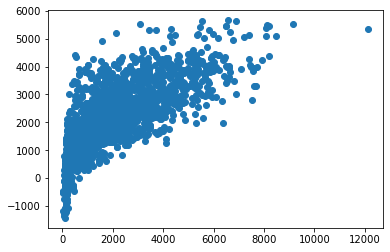

In [69]:
# plt.scatter(target_test, target_pred_test)
plt.scatter(y_test, y_pred_test)

In [70]:
r2 = r2_score(y_test, y_pred_test)
r2

0.5364438770117189

In [71]:
#  On test data R2 score is 53.64%

#### 2.Mean of Residuals

In [72]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

# Mean of residuals is close to 0

Mean of Residuals -9.295041187963865e-13


#### 3. Homoscedasticity


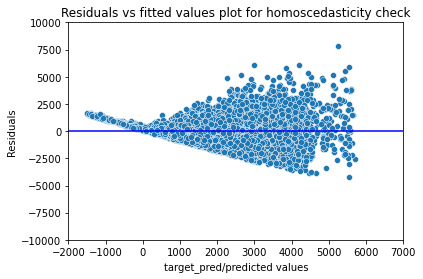

In [73]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('target_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10000,10000)
plt.xlim(-2000,7000)
p = sns.lineplot([-5000,7000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [74]:
# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic

# Alternative Hypothesis: Error terms are heteroscedastic.

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9447994858823973), ('p-value', 0.9511123308005905)]

In [76]:
# 'p-value'> 0.05 so we accept the NULL Hypothesis   Error terms are homoscedastic

#### 4. Check for Normality of error terms/residuals¶


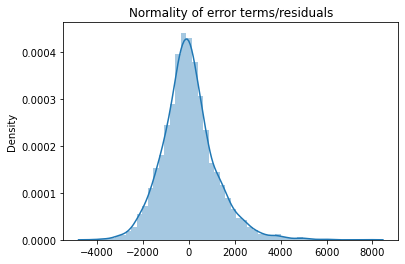

In [77]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [78]:
# Error is normally distributed

#### 5. No autocorrelation of residuals

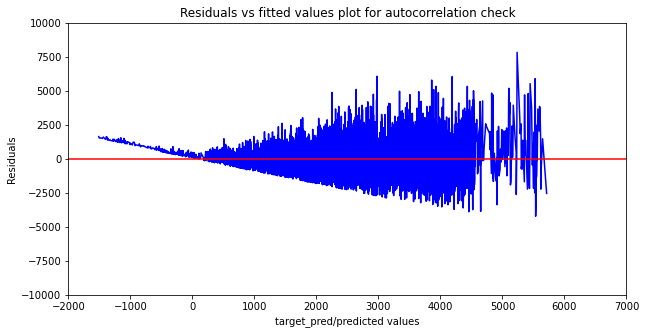

In [79]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,color='blue')#,marker='o'
plt.xlabel('target_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10000,10000)
plt.xlim(-2000,7000)
p = sns.lineplot([-5000,7000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                feature       VIF
0       Item_Visibility  2.707593
1             Item_Type  3.544636
2              Item_MRP  5.014379
3  Outlet_Location_Type  4.110337
4           Outlet_Type  8.575027
5    Outlet_Size_Medium  5.267465
6     Outlet_Size_Small  4.246903
